- 기본 데이터: https://www.kaggle.com/rounakbanik/the-movies-dataset
- 11월 29일 회의 결과: 'vote_count' 컬럼에 대한 머신러닝 -> 'budget' 컬럼에 대한 머신러닝으로 변경
    - 이에 따라 자료 전처리 과정 수정

## Ⅰ. EDA / 전처리

### 1. movies_metadata.csv 살펴보기

In [1]:
import pandas as pd

In [2]:
movies_metadata = pd.read_csv('../data/movies_metadata.csv')

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### 2. 중복값 / null값 처리
- 중복값
    - 'id'컬럼(tmdb id) 이용해 확인 가능.
- 컬럼별 null값
    - 'belongs_to_collection': 시리즈 관련. 시리즈물 여부에 대한 컬럼 생성(null일 경우 0, 값이 존재할 경우 1)해 분석할 수 있을 듯.
    - 'homepage': 영화 공식 홈페이지 주소. 컬럼 자체를 삭제해도 무방.
    - 'imdb_id': 영화 고유값으로서의 역할은 tmdb id('id' 컬럼)으로도 할 수 있음. 컬럼 자체를 삭제해도 무방.
    - 'original_language': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'overview': 영화 소개글. 컬럼 자체를 삭제해도 무방.
    - 'popularity': tmdb에서 다시 확인해본 뒤 없으면 해당 영화만 삭제.
    - 'poster_path': 포스터 이미지 경로값 저장. 컬럼 자체를 삭제해도 무방.
    - 'production_companies': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'production_countries': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'release_date': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'revenue': null값 데이터 삭제
    - 'runtime': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'spoken_language': null값을 가진 영화만 삭제 또는 검색을 통해 채워넣기 가능
    - 'status': 개봉한 영화를 대상으로 하므로 값이 'Released'인 경우만 남김
    - 'tagline': 태그라인. 유의미한 값이 많으면 자연어 처리를 해볼 수도 있지만, null값의 비율이 커 삭제.
    - 'title', 'video', 'vote_average', 'vote_count': 이 컬럼들이 빈 값은 아래와 같이 확인 결과 다른 값도 대다수 비어 있음. 삭제.

In [6]:
movies_metadata[movies_metadata['vote_count'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 위의 결과에서 일부 잘못 들어간 값이 확인됨. 해당 값 삭제 처리.
- 앞서 'status' 컬럼에서 'Released'인 경우만 남기기로 했으므로 이 방식으로 잘못 들어간 값도 삭제 가능.

In [7]:
is_released = movies_metadata['status'] == 'Released'
movies = movies_metadata[is_released]
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#### 1) 중복값 처리

In [8]:
movies['id'].value_counts()

141971    3
152795    2
265189    2
119916    2
13209     2
         ..
47808     1
33217     1
29989     1
90634     1
461257    1
Name: id, Length: 44985, dtype: int64

In [9]:
movies.drop_duplicates(['id'], inplace=True)

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
# 확인
movies['id'].value_counts()

862       1
117452    1
175518    1
146730    1
72204     1
         ..
31561     1
1912      1
35002     1
47813     1
461257    1
Name: id, Length: 44985, dtype: int64

#### 2) null값 처리

In [11]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40522
budget                       0
genres                       0
homepage                 37284
id                           0
imdb_id                     15
original_language           10
original_title               0
overview                   920
popularity                   0
poster_path                373
production_companies         0
production_countries         0
release_date                78
revenue                      0
runtime                    251
spoken_languages             0
status                       0
tagline                  24696
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

- original_language 컬럼 null값은 검색해 추가

In [12]:
movies = movies.reset_index()

In [13]:
movies.drop('index', axis=1, inplace=True)

In [14]:
movies[movies['original_language'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19452,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,283101,tt0429086,NaN,Shadowing the Third Man,Documentary about the production of The Third ...,...,2004-10-11,0.0,95.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Shadowing the Third Man,False,0.0,0.0
21456,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,103902,tt0838231,NaN,Unfinished Sky,An Outback farmer takes in an Afghani woman wh...,...,2007-08-04,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Unfinished Sky,False,6.4,8.0
22673,False,NaN,0,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,359195,tt0053558,NaN,13 Fighting Men,A group of Union Army soldiers is charged with...,...,1960-03-31,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,13 Fighting Men,False,0.0,0.0
31873,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,147050,tt0122580,NaN,Lambchops,George and Gracie enter an elegant drawing roo...,...,1929-10-31,0.0,8.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Lambchops,False,6.5,2.0
37071,False,NaN,0,"[{'id': 16, 'name': 'Animation'}]",NaN,257095,tt0225145,NaN,Bajaja,The first fairy tale transformed into a full-l...,...,1950-01-26,0.0,87.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Prince Bayaya,False,5.0,1.0
40657,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,332742,tt4432912,NaN,Song of Lahore,"Until the late 1970s, the Pakistani city of La...",...,2015-11-13,0.0,82.0,"[{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63...",Released,NaN,Song of Lahore,False,6.5,2.0
41469,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,144410,tt0154152,NaN,Annabelle Serpentine Dance,Two dancers perform in succession facing a sta...,...,1895-04-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Annabelle Serpentine Dance,False,5.7,20.0
43614,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,380438,tt0298411,NaN,Lettre d'une inconnue,NaN,...,2001-01-01,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Lettre d'une inconnue,False,0.0,0.0
43959,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 99, '...",NaN,381096,tt5333518,NaN,Garn,The traditional crafts of crochet and knitting...,...,2016-03-12,0.0,76.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,NaN,Yarn,False,0.0,0.0
44119,False,NaN,0,[],NaN,381525,tt5376720,NaN,WiNWiN,American investment fund buys Austrian compani...,...,2016-01-27,0.0,84.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,WiNWiN,False,0.0,0.0


In [15]:
movies.iloc[19452, 7] = 'en'
movies.iloc[21456, 7] = 'en'
movies.iloc[22673, 7] = 'en'
movies.iloc[31873, 7] = 'en'
movies.iloc[37071, 7] = 'cz'
movies.iloc[40657, 7] = 'en'
movies.iloc[43614, 7] = 'fr'
movies.iloc[43959, 7] = 'en'
movies.iloc[44119, 7] = 'de'

# 'Annabelle Serpentine Dance'는 무성영화로 보임

In [16]:
# 확인
movies[movies['original_language'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
41469,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,144410,tt0154152,NaN,Annabelle Serpentine Dance,Two dancers perform in succession facing a sta...,...,1895-04-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Annabelle Serpentine Dance,False,5.7,20.0


- 'release_date' / 'runtime' 컬럼 null값은 제외 처리

In [17]:
movies = movies[movies['release_date'].notna()]
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [18]:
movies = movies[movies['runtime'].notna()]

- genres, production_companies 컬럼은 번호와 이름 분리해 리스트 형식으로 새 컬럼 생성.
- spoken_languages, production_countries 컬럼은 이름만 분리해 새 컬럼 생성.

In [19]:
type(movies['genres'][0])

str

In [20]:
import ast

In [21]:
movies['genres'] = movies['genres'].apply(ast.literal_eval)

In [22]:
movies['genres_id'] = movies['genres'].apply(lambda x: [v.get('id') for v in x])
movies['genres_name'] = movies['genres'].apply(lambda x: [v.get('name') for v in x])

In [23]:
type(movies['production_companies'][0])

str

In [24]:
movies['production_companies'] = movies['production_companies'].apply(ast.literal_eval)
movies['production_companies_id'] = movies['production_companies'].apply(lambda x: [v.get('id') for v in x])
movies['production_companies_name'] = movies['production_companies'].apply(lambda x: [v.get('name') for v in x])

In [25]:
type(movies['spoken_languages'][0])

str

In [26]:
movies['spoken_languages'] = movies['spoken_languages'].apply(ast.literal_eval)
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: [v.get('name') for v in x])

In [28]:
type(movies['production_countries'][0])

str

In [29]:
movies['production_countries'] = movies['production_countries'].apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [v.get('name') for v in x])

- 필요한 컬럼만 남기고 삭제.
- budget, revenue, vote_average 는 성공을 예측하는 다른 척도로 설정했으므로 제외.
- status는 Released만 남겼으므로 제외.

In [30]:
movies_df = movies[['original_title', 'title', 'id', 'release_date', 'genres_name', 'genres_id', 'runtime', 'popularity', 'original_language', 'spoken_languages', 'production_companies_name', 'production_companies_id', 'production_countries', 'adult', 'vote_count']]

In [31]:
movies_df.head()

,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,original_language,spoken_languages,production_companies_name,production_companies_id,production_countries,adult,vote_count
0,Toy Story,Toy Story,862,1995-10-30,"[Animation, Comedy, Family]","[16, 35, 10751]",81.0,21.946943,en,[English],[Pixar Animation Studios],[3],[United States of America],False,5415.0
1,Jumanji,Jumanji,8844,1995-12-15,"[Adventure, Fantasy, Family]","[12, 14, 10751]",104.0,17.015539,en,"[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]",[United States of America],False,2413.0
2,Grumpier Old Men,Grumpier Old Men,15602,1995-12-22,"[Romance, Comedy]","[10749, 35]",101.0,11.7129,en,[English],"[Warner Bros., Lancaster Gate]","[6194, 19464]",[United States of America],False,92.0
3,Waiting to Exhale,Waiting to Exhale,31357,1995-12-22,"[Comedy, Drama, Romance]","[35, 18, 10749]",127.0,3.859495,en,[English],[Twentieth Century Fox Film Corporation],[306],[United States of America],False,34.0
4,Father of the Bride Part II,Father of the Bride Part II,11862,1995-02-10,[Comedy],[35],106.0,8.387519,en,[English],"[Sandollar Productions, Touchstone Pictures]","[5842, 9195]",[United States of America],False,173.0


In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44667 entries, 0 to 44984
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adult                      44667 non-null  object 
 1   belongs_to_collection      4456 non-null   object 
 2   budget                     44667 non-null  object 
 3   genres                     44667 non-null  object 
 4   homepage                   7690 non-null   object 
 5   id                         44667 non-null  object 
 6   imdb_id                    44657 non-null  object 
 7   original_language          44666 non-null  object 
 8   original_title             44667 non-null  object 
 9   overview                   44000 non-null  object 
 10  popularity                 44667 non-null  object 
 11  poster_path                44352 non-null  object 
 12  production_companies       44667 non-null  object 
 13  production_countries       44667 non-null  obj

In [33]:
movies_df.to_csv(
    "../data/movie_df.csv", sep=",", encoding="utf-8"
)

In [34]:
movies_df = pd.read_csv("../data/movie_df.csv", encoding="utf-8")

### 3. Credit, Keyword 컬럼 추가

#### 1) credit.csv 정리

In [35]:
credits = pd.read_csv('../data/credits.csv')
credits.tail()

,cast,crew,id
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257


In [36]:
type(credits['cast'][0])

str

In [37]:
credits['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [38]:
# cast가 없을 수 있음. 자연다큐 등. 없는 값은 그대로 둠.

credits['cast'] = credits['cast'].apply(ast.literal_eval)
credits['cast_id'] = credits['cast'].apply(lambda x: [v.get('id') for v in x])
credits['cast_name'] = credits['cast'].apply(lambda x: [v.get('name') for v in x])

In [39]:
type(credits['crew'][0])

str

In [40]:
credits['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [41]:
# crew는 있어야 함.

credits = credits[credits.crew != '[]']

In [42]:
credits['crew'] = credits['crew'].apply(ast.literal_eval)

In [43]:
credits['crew_id'] = credits['crew'].apply(lambda x: [v.get('id') for v in x])
credits['crew_name'] = credits['crew'].apply(lambda x: [v.get('name') for v in x])

In [44]:
credits.tail()

,cast,crew,id,cast_id,cast_name,crew_id,crew_name
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"[240240, 1749839, 1619957]","[Leila Hatami, Kourosh Tahami, Elham Korda]","[1182809, 1182809, 1543705, 1749842, 1749847, ...","[Hamid Nematollah, Hamid Nematollah, Farshad M..."
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,"[1043186, 111636, 1204271, 278923, 1042953, 57...","[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","[1051381, 1051381, 1728582, 1051381, 1051381, ...","[Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, La..."
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"[23764, 2059, 46277, 1736, 58646, 54649, 55270...","[Erika Eleniak, Adam Baldwin, Julie du Page, J...","[67753, 19713, 549355, 549356, 58818]","[Mark L. Lester, C. Courtney Joyner, Jeffrey G..."
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,"[544742, 1090923, 1136422, 1261758, 29199]","[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...","[1085341, 1195656]","[Yakov Protazanov, Joseph N. Ermolieff]"
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257,[],[],[1344495],[Daisy Asquith]


#### 2) keyword.csv 정리

In [45]:
keywords = pd.read_csv('../data/keywords.csv')
keywords.tail()

,id,keywords
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]
46418,461257,[]


In [46]:
type(keywords['keywords'][0])

str

In [47]:
# keyword 있는 값만 가져오기

keywords = keywords[keywords.keywords != '[]']

In [48]:
keywords['keywords'][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [49]:
keywords['keywords'] = keywords['keywords'].apply(ast.literal_eval)

In [50]:
keywords['keywords_id'] = keywords['keywords'].apply(lambda x: [v.get('id') for v in x])
keywords['keywords_name'] = keywords['keywords'].apply(lambda x: [v.get('name') for v in x])

In [51]:
keywords.tail()

,id,keywords,keywords_id,keywords_name
46409,84419,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,...","[9748, 9826, 10714, 14512, 173245, 179083, 189...","[revenge, murder, serial killer, new york city..."
46410,390959,"[{'id': 224180, 'name': 'blair witch'}]",[224180],[blair witch]
46411,289923,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n...","[616, 2035, 3754, 10714, 11800]","[witch, mythology, legend, serial killer, mock..."
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]",[10703],[tragic love]
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...","[2679, 14531, 215397]","[artist, play, pinoy]"


In [52]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31624 entries, 0 to 46415
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31624 non-null  int64 
 1   keywords       31624 non-null  object
 2   keywords_id    31624 non-null  object
 3   keywords_name  31624 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


#### 3) id 이용해 병합(inner)

In [53]:
merge_df = pd.merge(credits, keywords, on='id')

In [54]:
merge_df.tail()

,cast,crew,id,cast_id,cast_name,crew_id,crew_name,keywords,keywords_id,keywords_name
31512,"[{'cast_id': 5, 'character': 'The Creeper', 'c...","[{'credit_id': '58152c139251415a7f0047e2', 'de...",84419,"[931198, 34117, 19967, 34287, 29142, 6933, 143...","[Rondo Hatton, Robert Lowery, Virginia Grey, B...","[12348, 16753, 29813, 30412, 89745, 96696, 117...","[Russell A. Gausman, John B. Goodman, Jack P. ...","[{'id': 9748, 'name': 'revenge'}, {'id': 9826,...","[9748, 9826, 10714, 14512, 173245, 179083, 189...","[revenge, murder, serial killer, new york city..."
31513,"[{'cast_id': 30, 'character': 'Debuty Hank Har...","[{'credit_id': '56ff6ddbc3a3686e9e0013bc', 'de...",390959,"[53303, 204174, 79736, 1099459, 1599751, 15997...","[Tony Abatemarco, Andre Brooks, Mariclare Cost...","[76541, 76541, 1599733, 1599735, 75651, 76541,...","[Ben Rock, Ben Rock, Jay Bogdanowitsch, Pirie ...","[{'id': 224180, 'name': 'blair witch'}]",[224180],[blair witch]
31514,"[{'cast_id': 2, 'character': 'Branwall', 'cred...","[{'credit_id': '5403d669c3a3682d9800427d', 'de...",289923,"[44616, 9300, 1359316, 1099459, 1099455, 26851...","[Monty Bane, Lucy Butler, David Grammer, Bill ...","[76541, 76541]","[Ben Rock, Ben Rock]","[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n...","[616, 2035, 3754, 10714, 11800]","[witch, mythology, legend, serial killer, mock..."
31515,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"[240240, 1749839, 1619957]","[Leila Hatami, Kourosh Tahami, Elham Korda]","[1182809, 1182809, 1543705, 1749842, 1749847, ...","[Hamid Nematollah, Hamid Nematollah, Farshad M...","[{'id': 10703, 'name': 'tragic love'}]",[10703],[tragic love]
31516,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,"[1043186, 111636, 1204271, 278923, 1042953, 57...","[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","[1051381, 1051381, 1728582, 1051381, 1051381, ...","[Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, La...","[{'id': 2679, 'name': 'artist'}, {'id': 14531,...","[2679, 14531, 215397]","[artist, play, pinoy]"


In [55]:
merge_df.drop('cast', axis=1, inplace=True)

In [56]:
merge_df.drop('crew', axis=1, inplace=True)

In [57]:
merge_df.drop('keywords', axis=1, inplace=True)

In [58]:
type(merge_df['id'][0])

numpy.int64

In [59]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31517 entries, 0 to 31516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31517 non-null  int64 
 1   cast_id        31517 non-null  object
 2   cast_name      31517 non-null  object
 3   crew_id        31517 non-null  object
 4   crew_name      31517 non-null  object
 5   keywords_id    31517 non-null  object
 6   keywords_name  31517 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [60]:
type(movies_df['id'][0])

numpy.int64

In [61]:
movies_df['id'] = movies_df['id'].astype(int)

In [62]:
df = pd.merge(movies_df, merge_df, on='id')

In [63]:
df.head(1)

,Unnamed: 0,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,original_language,...,production_companies_id,production_countries,adult,vote_count,cast_id,cast_name,crew_id,crew_name,keywords_id,keywords_name
0,0,Toy Story,Toy Story,862,1995-10-30,"['Animation', 'Comedy', 'Family']","[16, 35, 10751]",81.0,21.946943,en,...,[3],['United States of America'],False,5415.0,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[7879, 12891, 7, 12892, 12893, 12894, 12895, 1...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[931, 4290, 5202, 6054, 9713, 9823, 165503, 17...","[jealousy, toy, boy, friendship, friends, riva..."


In [64]:
df.to_csv(
    "../data/project_df.csv", sep=",", encoding="utf-8"
)

In [65]:
df = pd.read_csv("../data/project_df.csv", sep=",", encoding="utf-8")

In [66]:
df_new = df[(df['release_date']>='2000-01-01')]

In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15485 entries, 1852 to 31283
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 15485 non-null  int64  
 1   Unnamed: 0.1               15485 non-null  int64  
 2   original_title             15485 non-null  object 
 3   title                      15485 non-null  object 
 4   id                         15485 non-null  int64  
 5   release_date               15485 non-null  object 
 6   genres_name                15485 non-null  object 
 7   genres_id                  15485 non-null  object 
 8   runtime                    15485 non-null  float64
 9   popularity                 15485 non-null  float64
 10  original_language          15485 non-null  object 
 11  spoken_languages           15485 non-null  object 
 12  production_companies_name  15485 non-null  object 
 13  production_companies_id    15485 non-null  

### 4. revenue, budget, vote_average 컬럼 추가 (회의내용 반영)
- 회의 결과(11.29)에 따라 삭제했던 컬럼 다시 되살림.

In [69]:
movies['id'] = movies['id'].astype(int)

In [102]:
new_df = pd.merge(df_new, movies[['revenue', 'budget', 'vote_average', 'id']], on='id')

In [103]:
type(new_df['revenue'][0])

numpy.float64

In [104]:
type(new_df['budget'][0])

str

In [105]:
type(new_df['vote_average'][0])

numpy.float64

In [106]:
# str형을 다른 컬럼과 마찬가지로 계산할 수 있는 float형으로 변환

new_df['budget'] = new_df['budget'].astype(float)

In [107]:
# budget과 revenue는 0일 수 없으므로 해당 데이터 삭제

new_df = new_df[new_df.revenue != 0]

In [108]:
new_df = new_df[new_df.budget != 0]

In [109]:
new_df.tail()

,Unnamed: 0,Unnamed: 0.1,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,...,vote_count,cast_id,cast_name,crew_id,crew_name,keywords_id,keywords_name,revenue,budget,vote_average
15366,31088,44544,The Dark Tower,The Dark Tower,353491,2017-08-03,"['Action', 'Western', 'Science Fiction', 'Fant...","[28, 37, 878, 14, 27]",95.0,50.903593,...,688.0,"[17605, 10297, 1696753, 1401531, 51533, 103628...","['Idris Elba', 'Matthew McConaughey', 'Tom Tay...","[339, 1012, 1012, 5914, 3027, 3027, 5575, 5575...","['Brian Grazer', 'Anders Thomas Jensen', 'Ande...","[75, 818]","['gunslinger', 'based on novel']",71000000.0,60000000.0,5.7
15400,31138,44663,The Emoji Movie,The Emoji Movie,378236,2017-07-28,"['Comedy', 'Family', 'Animation']","[35, 10751, 16]",86.0,33.694599,...,327.0,"[51990, 55466, 1772, 52792, 3214, 38334, 60255...","['T.J. Miller', 'James Corden', 'Anna Faris', ...","[6874, 7903, 9152, 14819, 76746, 89112, 89112,...","['Ben Waisbren', 'Mary Hidalgo', 'Patrick Doyl...","[207468, 229979, 229980]","['app', 'emoji', 'smartphone']",66913939.0,50000000.0,5.8
15404,31149,44690,Wind River,Wind River,395834,2017-08-03,"['Action', 'Crime', 'Mystery', 'Thriller']","[28, 80, 9648, 53]",111.0,40.796775,...,181.0,"[17604, 550843, 84225, 205976, 19498, 6804, 87...","['Jeremy Renner', 'Elizabeth Olsen', 'Gil Birm...","[1614580, 36602, 935798, 67759, 1614581, 74319...","['Elizabeth A. Bell', 'Peter Berg', 'Matthew G...","[570, 1262, 1419, 5340, 9826, 10322, 10950, 13...","['rape', 'mountain', 'gun', 'investigation', '...",184770205.0,11000000.0,7.4
15432,31189,44772,சிவாஜி,Sivaji: The Boss,24049,2007-06-14,"['Action', 'Comedy', 'Drama']","[28, 35, 18]",185.0,1.323587,...,25.0,"[91555, 91557, 145628, 85523, 237697, 545009, ...","['Rajinikanth', 'Suman', 'Shriya Saran', 'Vive...","[5288, 81090, 89154, 91552, 91552, 91552, 9155...","['A. R. Rahman', 'Anthony', 'Prabhu Deva', 'S....","[5969, 156024, 206225]","['black money', 'corrupt politician', 'educati...",19000000.0,12000000.0,6.9
15471,31255,44919,Все и сразу,All at Once,280422,2014-06-05,"['Crime', 'Comedy']","[80, 35]",0.0,0.201582,...,4.0,"[1337734, 1337735, 1337736, 1337737, 1337738, ...","['Andrey Muravyov', 'Yuliya Khlynina', 'Anton ...","[225680, 225680, 1337733]","['Roman Karimov', 'Roman Karimov', 'Roman Ugle...","[642, 231149]","['robbery', 'mob']",3.0,750000.0,6.0


In [110]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 6 to 15471
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3199 non-null   int64  
 1   Unnamed: 0.1               3199 non-null   int64  
 2   original_title             3199 non-null   object 
 3   title                      3199 non-null   object 
 4   id                         3199 non-null   int64  
 5   release_date               3199 non-null   object 
 6   genres_name                3199 non-null   object 
 7   genres_id                  3199 non-null   object 
 8   runtime                    3199 non-null   float64
 9   popularity                 3199 non-null   float64
 10  original_language          3199 non-null   object 
 11  spoken_languages           3199 non-null   object 
 12  production_companies_name  3199 non-null   object 
 13  production_companies_id    3199 non-null   obje

In [111]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)
new_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [112]:
new_df.reset_index(drop=True)

,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,original_language,spoken_languages,...,vote_count,cast_id,cast_name,crew_id,crew_name,keywords_id,keywords_name,revenue,budget,vote_average
0,Next Friday,Next Friday,10471,2000-01-12,['Comedy'],[35],98.0,10.065450,en,['English'],...,145.0,"[9778, 51944, 57389, 56902, 65132, 16429, 4807...","['Ice Cube', 'Mike Epps', 'Justin Pierce', 'Jo...","[52112, 9778, 5287, 3121, 50723, 9778, 9778, 6...","['Steve Carr', 'Ice Cube', 'Terence Blanchard'...","[378, 1522, 2987, 7858, 9748, 9777, 10685, 126...","['prison', 'repayment', 'gang war', 'boy gang'...",59827328.0,11000000.0,6.5
1,Supernova,Supernova,10384,2000-01-14,"['Horror', 'Science Fiction', 'Thriller']","[27, 878, 53]",91.0,5.496624,en,['English'],...,109.0,"[13548, 9780, 5694, 38560, 56857, 17346, 54453...","['James Spader', 'Angela Bassett', 'Robert For...","[1723, 2121, 2530, 7733, 11308, 15332, 17233, ...","['Walter Hill', 'Mary Jo Slater', 'Bob Ringwoo...","[577, 1472, 2964, 3412, 5100, 222423]","['black people', 'starships', 'future', 'star'...",14828081.0,90000000.0,4.9
2,Isn't She Great,Isn't She Great,75531,2000-01-28,"['Drama', 'Comedy']","[18, 35]",95.0,0.907927,de,['English'],...,14.0,"[73931, 78729, 8893, 11076, 8930, 14101, 2956,...","['Bette Midler', 'Nathan Lane', 'Stockard Chan...","[284, 2988, 6048, 8677, 9580, 32588, 31143, 37...","['Gary Levinsohn', 'Barry Malkin', 'Mark Gordo...",[1646],['autism'],3003296.0,36000000.0,4.6
3,Scream 3,Scream 3,4234,2000-02-03,"['Horror', 'Mystery']","[27, 9648]",116.0,9.738371,en,['English'],...,749.0,"[15234, 9206, 14405, 18352, 35595, 2714, 35598...","['David Arquette', 'Neve Campbell', 'Courteney...","[5140, 26458, 15244, 409, 35581, 26458, 7229, ...","['Wes Craven', 'Kevin Williamson', 'Ehren Krug...","[2546, 2573, 2793, 8440, 12193, 12339, 13124, ...","['mask', 'metal detector', 'film director', 'e...",161834276.0,40000000.0,5.7
4,Gun Shy,Gun Shy,29076,2000-02-04,"['Action', 'Comedy', 'Romance', 'Thriller']","[28, 35, 10749, 53]",101.0,6.370105,en,['English'],...,24.0,"[18277, 3896, 17485, 10963, 52422, 31028, 1980...","['Sandra Bullock', 'Liam Neeson', 'Oliver Plat...","[95818, 95818]","['Eric Blakeney', 'Eric Blakeney']","[293, 10175, 15274]","['female nudity', 'drug cartel', 'nervous brea...",1631839.0,10000000.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,The Dark Tower,The Dark Tower,353491,2017-08-03,"['Action', 'Western', 'Science Fiction', 'Fant...","[28, 37, 878, 14, 27]",95.0,50.903593,en,['English'],...,688.0,"[17605, 10297, 1696753, 1401531, 51533, 103628...","['Idris Elba', 'Matthew McConaughey', 'Tom Tay...","[339, 1012, 1012, 5914, 3027, 3027, 5575, 5575...","['Brian Grazer', 'Anders Thomas Jensen', 'Ande...","[75, 818]","['gunslinger', 'based on novel']",71000000.0,60000000.0,5.7
3195,The Emoji Movie,The Emoji Movie,378236,2017-07-28,"['Comedy', 'Family', 'Animation']","[35, 10751, 16]",86.0,33.694599,en,['English'],...,327.0,"[51990, 55466, 1772, 52792, 3214, 38334, 60255...","['T.J. Miller', 'James Corden', 'Anna Faris', ...","[6874, 7903, 9152, 14819, 76746, 89112, 89112,...","['Ben Waisbren', 'Mary Hidalgo', 'Patrick Doyl...","[207468, 229979, 229980]","['app', 'emoji', 'smartphone']",66913939.0,50000000.0,5.8
3196,Wind River,Wind River,395834,2017-08-03,"['Action', 'Crime', 'Mystery', 'Thriller']","[28, 80, 9648, 53]",111.0,40.796775,en,['English'],...,181.0,"[17604, 550843, 84225, 205976, 19498, 6804, 87...","['Jeremy Renner', 'Elizabeth Olsen', 'Gil Birm...","[1614580, 36602, 935798, 67759, 1614581, 74319...","['Elizabeth A. Bell', 'Peter Berg', 'Matthew G...","[570, 1262, 1419, 5340, 9826, 10322, 10950, 13...","['rape', 'mountain', 'gun', 'investigation', '...",184770205.0,11000000.0,7.4
3197,சிவாஜி,Sivaji: The Boss,24049,2007-06-14,"['Action', 'Comedy', 'Drama']","[28, 35, 18]",185.0,1.323587,ta,"['தமிழ்', 'తెలుగు']",...,25.0,"[91555, 91557, 145628, 85523, 237697, 545

In [113]:
new_df.to_csv(
    "../data/21c_movies.csv", sep=",", encoding="utf-8", index = None
)

### 5. 값 정리

#### 1) original language LabelEncoding

In [219]:
new_df = pd.read_csv('../data/21c_movies.csv', encoding='utf-8')

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# 리스트가 아니어서 전처리 없이 라벨 인코딩 가능한 값은 라벨 인코딩 진행
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

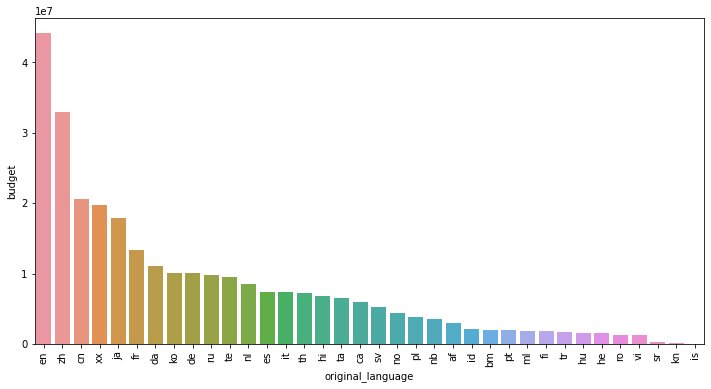

In [188]:
# original language에 따른 budget 평균값 차이 확인

lang_budget = new_df.pivot_table(index='original_language', values=['budget'], aggfunc=np.mean).sort_values(by='budget', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=lang_budget.index, y=lang_budget['budget'], data=lang_budget)
plt.xticks(rotation=90)
plt.show()

In [220]:
new_df['original_language'] = le.fit_transform(new_df['original_language'])

In [221]:
new_df.head()

,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,original_language,spoken_languages,...,vote_count,cast_id,cast_name,crew_id,crew_name,keywords_id,keywords_name,revenue,budget,vote_average
0,Next Friday,Next Friday,10471,2000-01-12,['Comedy'],[35],98.0,10.065450,6,['English'],...,145.0,"[9778, 51944, 57389, 56902, 65132, 16429, 4807...","['Ice Cube', 'Mike Epps', 'Justin Pierce', 'Jo...","[52112, 9778, 5287, 3121, 50723, 9778, 9778, 6...","['Steve Carr', 'Ice Cube', 'Terence Blanchard'...","[378, 1522, 2987, 7858, 9748, 9777, 10685, 126...","['prison', 'repayment', 'gang war', 'boy gang'...",59827328.0,11000000.0,6.5
1,Supernova,Supernova,10384,2000-01-14,"['Horror', 'Science Fiction', 'Thriller']","[27, 878, 53]",91.0,5.496624,6,['English'],...,109.0,"[13548, 9780, 5694, 38560, 56857, 17346, 54453...","['James Spader', 'Angela Bassett', 'Robert For...","[1723, 2121, 2530, 7733, 11308, 15332, 17233, ...","['Walter Hill', 'Mary Jo Slater', 'Bob Ringwoo...","[577, 1472, 2964, 3412, 5100, 222423]","['black people', 'starships', 'future', 'star'...",14828081.0,90000000.0,4.9
2,Isn't She Great,Isn't She Great,75531,2000-01-28,"['Drama', 'Comedy']","[18, 35]",95.0,0.907927,5,['English'],...,14.0,"[73931, 78729, 8893, 11076, 8930, 14101, 2956,...","['Bette Midler', 'Nathan Lane', 'Stockard Chan...","[284, 2988, 6048, 8677, 9580, 32588, 31143, 37...","['Gary Levinsohn', 'Barry Malkin', 'Mark Gordo...",[1646],['autism'],3003296.0,36000000.0,4.6
3,Scream 3,Scream 3,4234,2000-02-03,"['Horror', 'Mystery']","[27, 9648]",116.0,9.738371,6,['English'],...,749.0,"[15234, 9206, 14405, 18352, 35595, 2714, 35598...","['David Arquette', 'Neve Campbell', 'Courteney...","[5140, 26458, 15244, 409, 35581, 26458, 7229, ...","['Wes Craven', 'Kevin Williamson', 'Ehren Krug...","[2546, 2573, 2793, 8440, 12193, 12339, 13124, ...","['mask', 'metal detector', 'film director', 'e...",161834276.0,40000000.0,5.7
4,Gun Shy,Gun Shy,29076,2000-02-04,"['Action', 'Comedy', 'Romance', 'Thriller']","[28, 35, 10749, 53]",101.0,6.370105,6,['English'],...,24.0,"[18277, 3896, 17485, 10963, 52422, 31028, 1980...","['Sandra Bullock', 'Liam Neeson', 'Oliver Plat...","[95818, 95818]","['Eric Blakeney', 'Eric Blakeney']","[293, 10175, 15274]","['female nudity', 'drug cartel', 'nervous brea...",1631839.0,10000000.0,5.4


In [222]:
label_pd = pd.DataFrame(columns=['i', 'label'])
for i, label in enumerate(le.classes_):
    label_pd = label_pd.append(pd.DataFrame([[i, label]], columns=['i', 'label']), ignore_index=True)

label_pd

,i,label
0,0,af
1,1,bm
2,2,ca
3,3,cn
4,4,da
5,5,de
6,6,en
7,7,es
8,8,fi
9,9,fr


In [223]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   original_title             3199 non-null   object 
 1   title                      3199 non-null   object 
 2   id                         3199 non-null   int64  
 3   release_date               3199 non-null   object 
 4   genres_name                3199 non-null   object 
 5   genres_id                  3199 non-null   object 
 6   runtime                    3199 non-null   float64
 7   popularity                 3199 non-null   float64
 8   original_language          3199 non-null   int32  
 9   spoken_languages           3199 non-null   object 
 10  production_companies_name  3199 non-null   object 
 11  production_companies_id    3199 non-null   object 
 12  production_countries       3199 non-null   object 
 13  adult                      3199 non-null   bool 

#### 2) 장르, 크루, 캐스트, 키워드, 프로덕션컴패니는 대표값 1개의 id값만 추출


In [224]:
new_df['genres_id'] = new_df['genres_id'].apply(ast.literal_eval)

In [225]:
new_df['genres_id'] = new_df['genres_id'].apply(lambda x : x[:1])

In [226]:
new_df['crew_id'] = new_df['crew_id'].apply(ast.literal_eval)

In [227]:
new_df['crew_id'] = new_df['crew_id'].apply(lambda x : x[:1])

In [228]:
new_df['cast_id'] = new_df['cast_id'].apply(ast.literal_eval)
new_df['cast_id'] = new_df['cast_id'].apply(lambda x : x[:1])

In [229]:
new_df['keywords_id'] = new_df['keywords_id'].apply(ast.literal_eval)
new_df['keywords_id'] = new_df['keywords_id'].apply(lambda x : x[:1])

In [230]:
new_df['production_companies_id'] = new_df['production_companies_id'].apply(ast.literal_eval)
new_df['production_companies_id'] = new_df['production_companies_id'].apply(lambda x : x[:1])

In [231]:
new_df.head(1)

,original_title,title,id,release_date,genres_name,genres_id,runtime,popularity,original_language,spoken_languages,...,vote_count,cast_id,cast_name,crew_id,crew_name,keywords_id,keywords_name,revenue,budget,vote_average
0,Next Friday,Next Friday,10471,2000-01-12,['Comedy'],[35],98.0,10.06545,6,['English'],...,145.0,[9778],"['Ice Cube', 'Mike Epps', 'Justin Pierce', 'Jo...",[52112],"['Steve Carr', 'Ice Cube', 'Terence Blanchard'...",[378],"['prison', 'repayment', 'gang war', 'boy gang'...",59827328.0,11000000.0,6.5


In [232]:
new_df['genres_id']

0       [35]
1       [27]
2       [18]
3       [27]
4       [28]
        ... 
3194    [28]
3195    [35]
3196    [28]
3197    [28]
3198    [80]
Name: genres_id, Length: 3199, dtype: object

<AxesSubplot:>

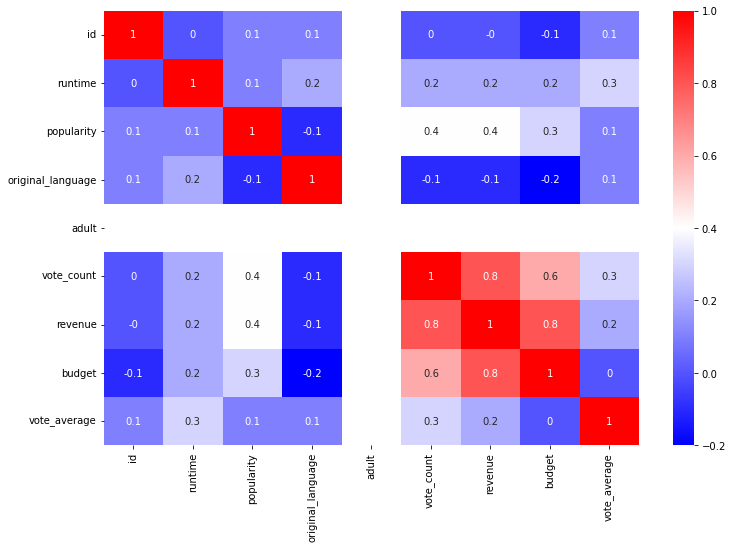

In [233]:
correlation_matrix = new_df.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [234]:
new_df.to_csv(
    "../data/21c_movies.csv", sep=",", encoding="utf-8", index = None
)

- budget은 vote_count, revenue와 관계가 있는 것으로 보임

## Ⅱ. 머신러닝

### 1. 주제
- 특정 조건의 영화를 만들고자 할 때, 예산을 얼마로 잡아야 할까?

#### 가설
#### 1) 예산과 런타임은 관계가 있다.
#### 2) 예산과 popularity(tmdb에서 자체 척도를 사용해 계산한 인기도)는 관계가 있다.
- '순수익(revenue-budget)'이 아닌 예산(budget)'만 가지고 머신러닝 진행해 가설 확인.

### 2. 모델링
- train, test 데이터는 8:2로 분리
- 전처리 없이 머신러닝 가능한 컬럼부터 확인

In [80]:
new_df = pd.read_csv("../data/21c_movies.csv", encoding="utf-8")

In [235]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   original_title             3199 non-null   object 
 1   title                      3199 non-null   object 
 2   id                         3199 non-null   int64  
 3   release_date               3199 non-null   object 
 4   genres_name                3199 non-null   object 
 5   genres_id                  3199 non-null   object 
 6   runtime                    3199 non-null   float64
 7   popularity                 3199 non-null   float64
 8   original_language          3199 non-null   int32  
 9   spoken_languages           3199 non-null   object 
 10  production_companies_name  3199 non-null   object 
 11  production_companies_id    3199 non-null   object 
 12  production_countries       3199 non-null   object 
 13  adult                      3199 non-null   bool 

- 'popularity', 'vote_count', 'vote_average', 'revenue'는 float
- 'original_language'는 라벨 인코딩 가능

#### 2) Multiple Linear Regression

In [239]:
from sklearn.model_selection import train_test_split

X = new_df[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime']]
y = new_df['budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [240]:
y_train

1803    82000000.0
215      7000000.0
1141     2200000.0
1712     2270000.0
1077    19000000.0
           ...    
866     30000000.0
2790    19000000.0
74      63600000.0
2224    25000000.0
338      4000000.0
Name: budget, Length: 2559, dtype: float64

In [241]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [242]:
pred_test = lr.predict(X_test)

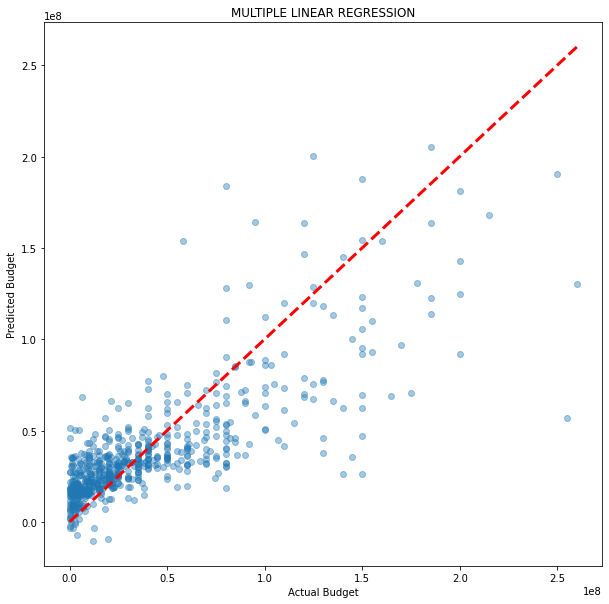

In [243]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred_test, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)
plt.xlabel("Actual Budget")
plt.ylabel("Predicted Budget")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

- budget이 커질수록 예측의 정확도가 떨어진다.

In [244]:
# 다중선형회귀 결정계수
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6153869345130061, 0.6116308088712938)

#### 3) Standard Scaler 적용 후 Multiple Linear Regression 재시도

In [245]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

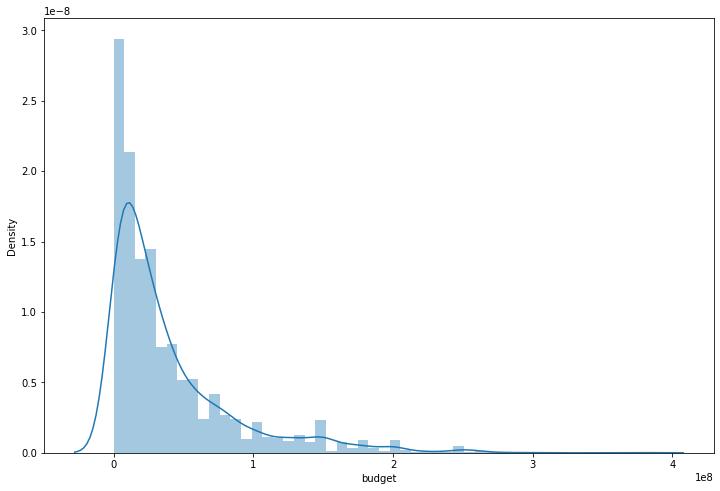

In [321]:
plt.figure(figsize=(12, 8))
sns.distplot(new_df['budget'])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

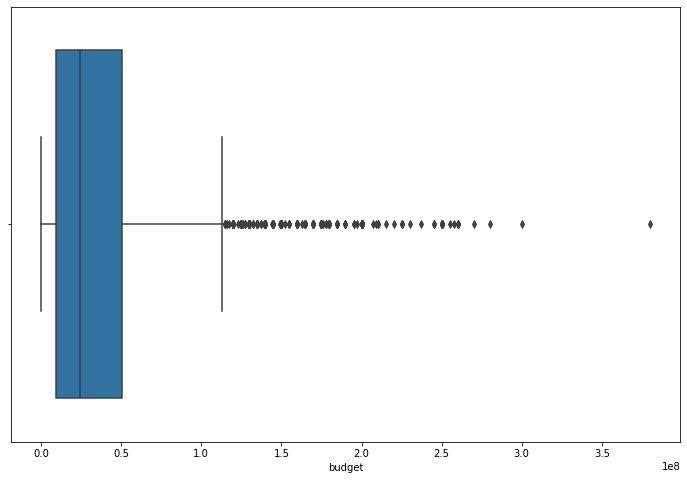

In [322]:
plt.figure(figsize=(12, 8))
sns.boxplot(new_df['budget'])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

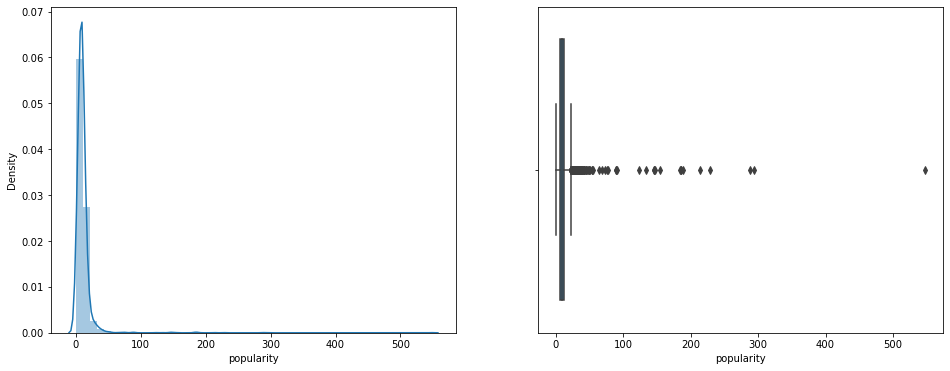

In [323]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['popularity'], ax=ax[0])
sns.boxplot(new_df['popularity'], ax=ax[1])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

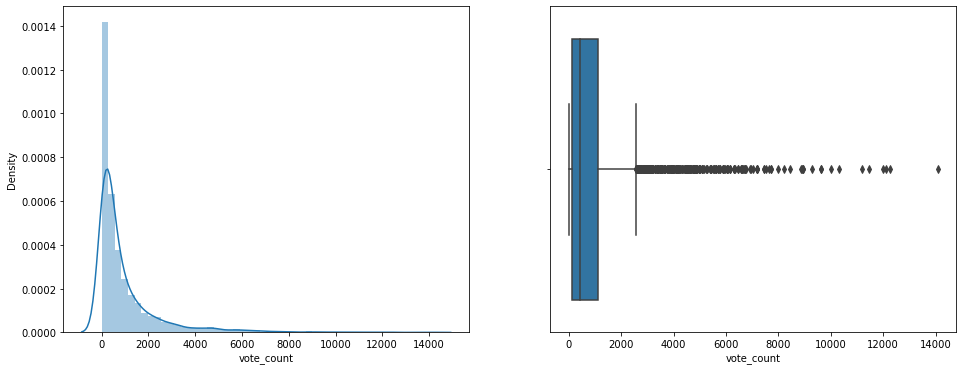

In [324]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['vote_count'], ax=ax[0])
sns.boxplot(new_df['vote_count'], ax=ax[1])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average'>

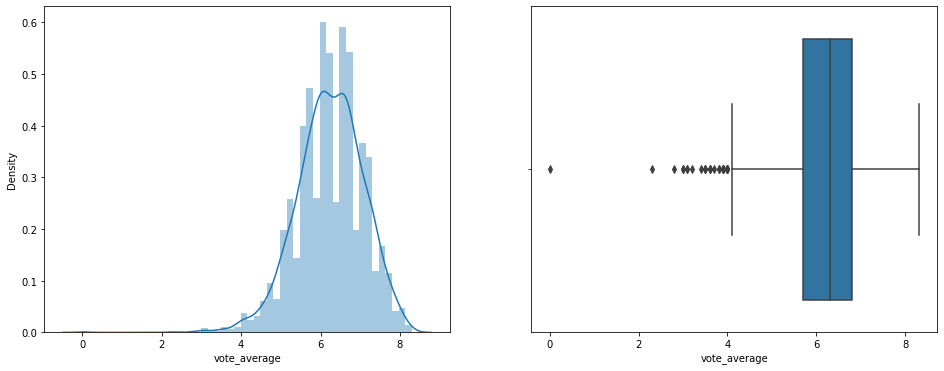

In [325]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['vote_average'], ax=ax[0])
sns.boxplot(new_df['vote_average'], ax=ax[1])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue'>

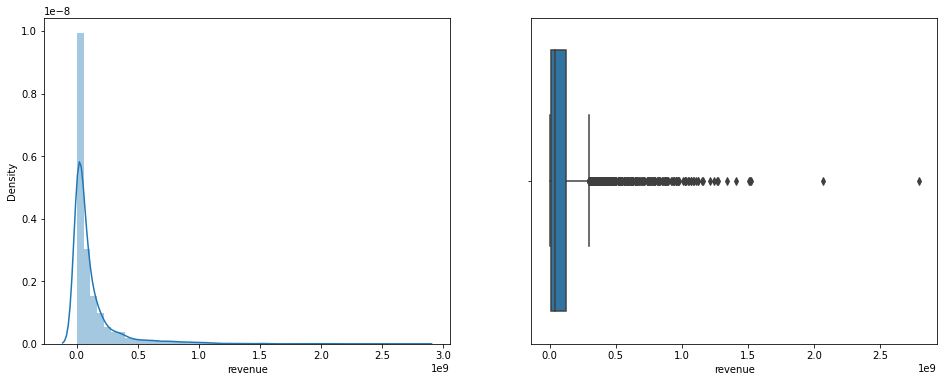

In [326]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['revenue'], ax=ax[0])
sns.boxplot(new_df['revenue'], ax=ax[1])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

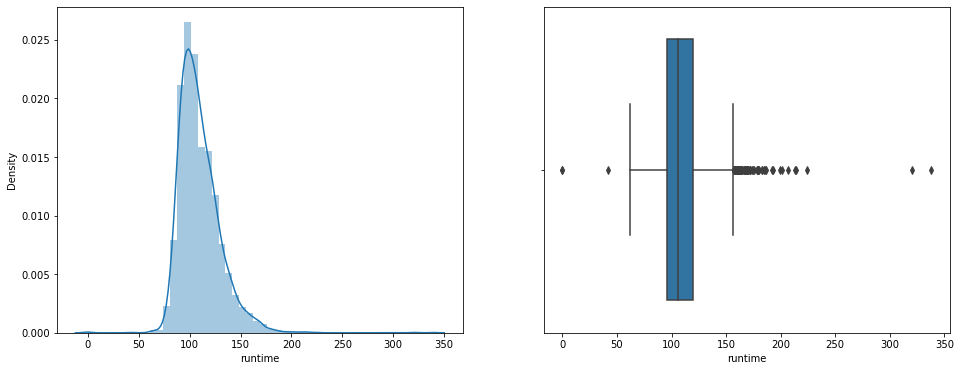

In [327]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['runtime'], ax=ax[0])
sns.boxplot(new_df['runtime'], ax=ax[1])

C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ser\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language'>

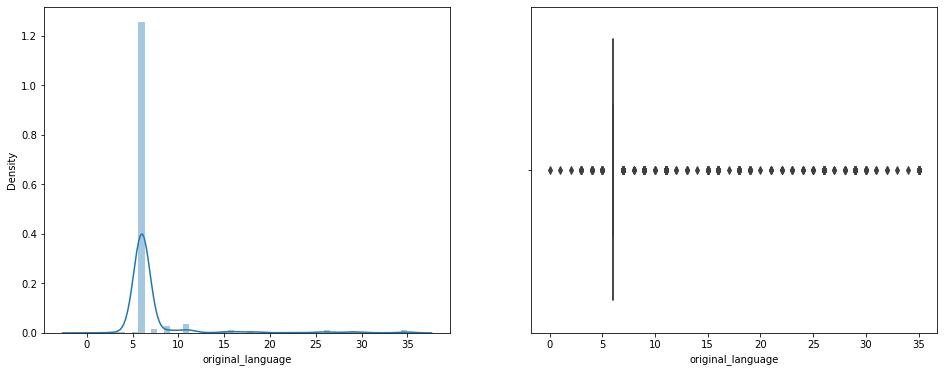

In [328]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(new_df['original_language'], ax=ax[0])
sns.boxplot(new_df['original_language'], ax=ax[1])

- 대부분 한 쪽으로 쏠려 있다.

In [329]:
new_df_sl = new_df[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime', 'budget']]
new_df_sl

,original_language,popularity,vote_count,vote_average,revenue,runtime,budget
0,6,10.065450,145.0,6.5,59827328.0,98.0,11000000.0
1,6,5.496624,109.0,4.9,14828081.0,91.0,90000000.0
2,5,0.907927,14.0,4.6,3003296.0,95.0,36000000.0
3,6,9.738371,749.0,5.7,161834276.0,116.0,40000000.0
4,6,6.370105,24.0,5.4,1631839.0,101.0,10000000.0
...,...,...,...,...,...,...,...
3194,6,50.903593,688.0,5.7,71000000.0,95.0,60000000.0
3195,6,33.694599,327.0,5.8,66913939.0,86.0,50000000.0
3196,6,40.796775,181.0,7.4,184770205.0,111.0,11000000.0
3197,29,1.323587,25.0,6.9,19000000.0,185.0,12000000.0


In [330]:
new_df_ss = ss.fit_transform(new_df_sl)
new_df_ss = pd.DataFrame(new_df_ss, columns=new_df_sl.columns)
new_df_ss['runtime'] = new_df_sl['runtime'] # runtime 값은 비교적 가운데에 있어 제외하였음
new_df_ss['vote_average'] = new_df_sl['vote_average'] # vote_arange 값은 약간의 쏠림만 있기 때문에 제외하였음
new_df_ss['budget'] = new_df_sl['budget'] # budget 값은 y값으로 사용하므로 제외하였음


In [331]:
X = new_df_ss[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime']]
y = new_df_ss['budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [332]:
lr.fit(X_train, y_train)
pred_test = lr.predict(X_test)

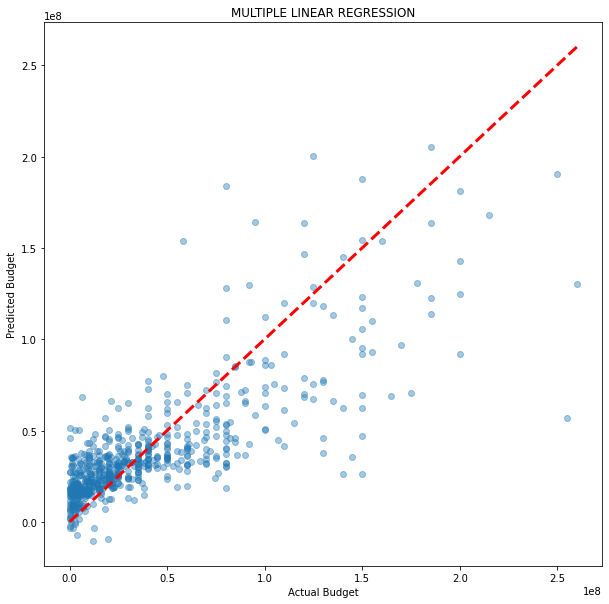

In [333]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred_test, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)
plt.xlabel("Actual Budget")
plt.ylabel("Predicted Budget")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [334]:
# 다중선형회귀 결정계수
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6153869345130061, 0.6116308088958613)

- 앞선 결과와 비슷함

#### 4) log scale 후 Multiple Linear Regression 재시도

In [284]:
new_df_ls = pd.DataFrame()
cols = ['original_language', 'popularity', 'vote_count', 'revenue']
for col in cols:
    log = np.log1p(new_df[col])
    new_df_ls[col] = log

In [287]:
new_df_ls['runtime'] = new_df_sl['runtime']
new_df_ls['vote_average'] = new_df_sl['vote_average']
new_df_ls['budget'] = new_df_sl['budget']

In [288]:
X = new_df_ls[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime']]
y = new_df_ls['budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [289]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

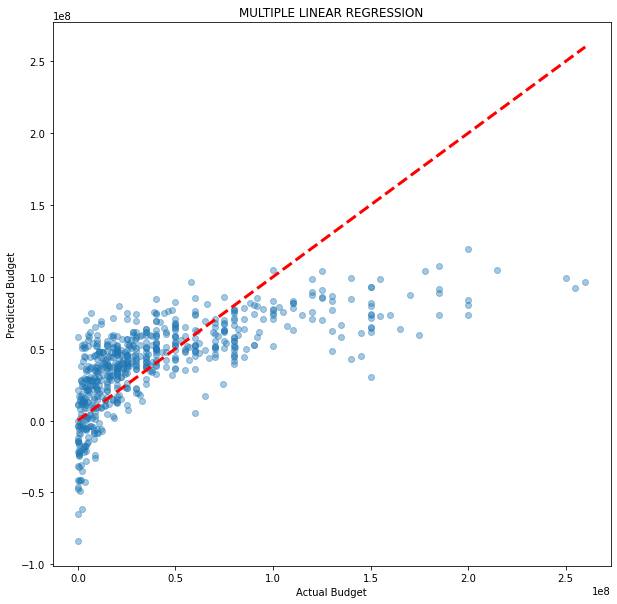

In [290]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)
plt.xlabel("Actual Budget")
plt.ylabel("Predicted Budget")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [291]:
# 다중선형회귀 결정계수
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.4230490558427935, 0.4470567128109706)

- 결과 더 안 좋아짐

#### 5) 아웃라이어 처리 후 Multiple Linear Regression 재시도

In [335]:
new_df_copy = new_df_ss.copy()

In [336]:
new_df_copy.head()

,original_language,popularity,vote_count,vote_average,revenue,runtime,budget
0,-0.262580,-0.061488,-0.562466,6.5,-0.275125,98.0,11000000.0
1,-0.262580,-0.330297,-0.587705,4.9,-0.506505,91.0,90000000.0
2,-0.488081,-0.600276,-0.654308,4.6,-0.567306,95.0,36000000.0
3,-0.262580,-0.080732,-0.139013,5.7,0.249381,116.0,40000000.0
4,-0.262580,-0.278906,-0.647297,5.4,-0.574358,101.0,10000000.0


In [337]:
def get_outlier(df=None, column=None, weight=1.5):

    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    return lowest_val, highest_val

In [338]:
get_outlier(new_df_ss, 'budget')

(-53400000.0, 113000000.0)

- budget 113000000 이상은 제외 처리(예산이 0 이하일 수는 없으므로 lowest 값은 적용  안 함)

In [339]:
new_df_copy = new_df_copy[new_df_copy['budget'] < 113000000]

In [340]:
get_outlier(new_df_ss, 'popularity')

(-0.8145179444032669, 0.6172640146340944)

- popularity(ss) 0.6172640146340944 이상, -0.8145179444032669 이하는 제외 처리

In [341]:
new_df_copy = new_df_copy[new_df_copy['popularity'] < 0.6172640146340944]
new_df_copy = new_df_copy[new_df_copy['popularity'] > -0.8145179444032669]

In [342]:
get_outlier(new_df_ss, 'vote_count')

(-1.5839405395697737, 1.1306435985608216)

- vote_count(ss) 1.1306435985608216 이상, -1.5839405395697737 이하는 제외 처리

In [343]:
new_df_copy = new_df_copy[new_df_copy['vote_count'] < 1.1306435985608216]
new_df_copy = new_df_copy[new_df_copy['vote_count'] > -1.5839405395697737]

In [344]:
get_outlier(new_df_ss, 'revenue')

(-1.4155517817115157, 0.9406519575530875)

- revenue(ss) 0.9406519575530875 이상 -1.4155517817115157 이하는 제외

In [345]:
new_df_copy = new_df_copy[new_df_copy['revenue'] < 0.9406519575530875]
new_df_copy = new_df_copy[new_df_copy['revenue'] > -1.4155517817115157]

In [346]:
X = new_df_copy[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime']]
y = new_df_copy['budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [347]:
y_pred = lr.predict(X_test)

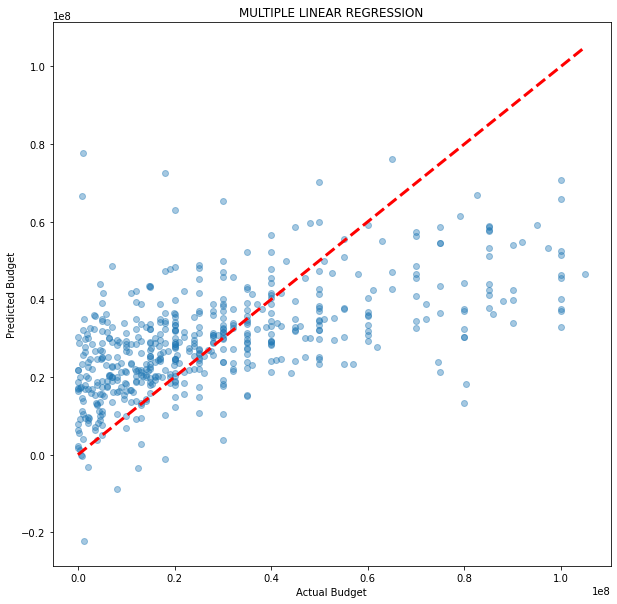

In [348]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)
plt.xlabel("Actual Budget")
plt.ylabel("Predicted Budget")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [349]:
# 다중선형회귀 결정계수
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.39734968273813176, 0.3415577000722875)

- outlier 제거 전보다 오히려 떨어짐

#### 6) PCA

In [353]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [350]:
X = new_df[['original_language', 'popularity', 'vote_count', 'vote_average', 'revenue', 'runtime']]
y = new_df['budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [351]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [355]:
pca = PCA(n_components=6)

In [356]:
X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

In [357]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_pca, y_train)

KNeighborsRegressor()

In [358]:
y_pred = model.predict(X_test_pca)

In [359]:
train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

In [360]:
train_score, test_score

(0.7732125809214951, 0.6336357863273181)

- Multiple Linear Regression보다 train 데이터의 결정계수값은 높지만 test 데이터는 비슷하다

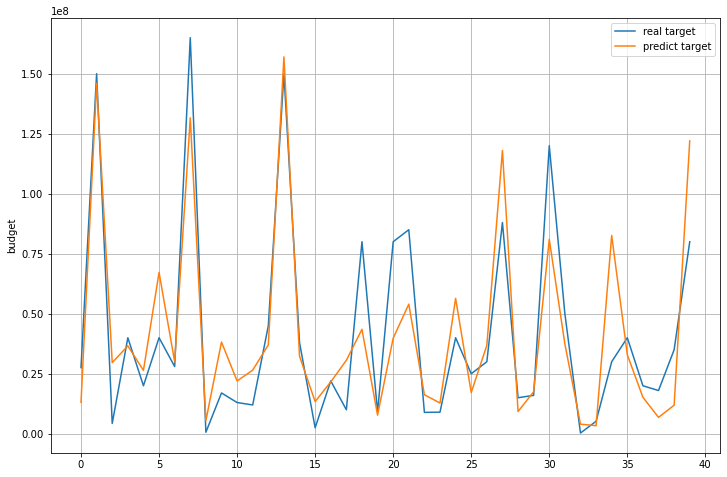

In [361]:
samples = 40
plt.figure(figsize=(12, 8))
plt.plot(range(samples), y_test[:samples], label = 'real target')
plt.plot(range(samples), y_pred[:samples], label = 'predict target')
plt.ylabel('budget')
plt.legend()
plt.grid()
plt.show()